In [1]:
import PIL
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
img = PIL.Image.open('dia_test.jpg') 
img1 = cv.imread('dia_test.jpg', 1)

In [3]:
#scale the image
scaled_cookie = cv.resize(img1, (255,255))

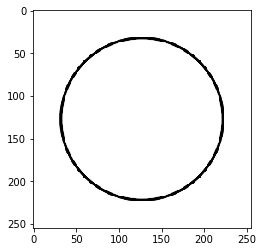

In [4]:
plt.imshow(scaled_cookie)

In [5]:
#grabcut for extracting the cookie foreground
mask = np.zeros(scaled_cookie.shape[:2], np.uint8)

bgmodel = np.zeros((1,65), np.float64)
fgmodel = np.zeros((1,65), np.float64)

#only the edges(10 px) will def be the background 
rectangle = (10, 10, 244, 244) 


cv.grabCut(scaled_cookie, mask, rectangle, bgmodel, fgmodel, 3, cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8') 

image_fg = scaled_cookie * mask2[:, :, np.newaxis] 

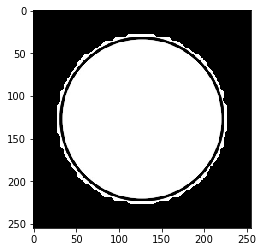

In [6]:
plt.imshow(image_fg)

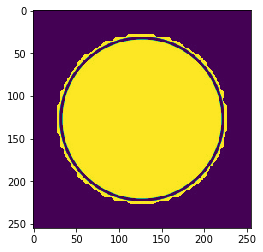

In [7]:
cv.imwrite("./image_fg.jpg", image_fg)

image_fg = cv.imread("./image_fg.jpg",0)
plt.imshow(image_fg)


In [8]:
count = 0
for i in range(image_fg.shape[0]):
    if image_fg[125][i] == 0:
        count = count + 1
    else:
        break
        

diameter = image_fg.shape[0] - count

count = 0
for i in range(image_fg.shape[0]-1,0,-1):
    if image_fg[125][i] == 0:
        count = count + 1
    else:
        break

diameter = diameter - count

print("diameter along X: ",diameter*0.0264583333, "cm")

diameter along X:  5.3710416599 cm


In [9]:
def X_dia(img_fg):
    count = 0
    for i in range(image_fg.shape[0]):
        if image_fg[125][i] == 0:
            count = count + 1
        else:
            break
        

    diameter = image_fg.shape[0] - count

    count = 0
    for i in range(image_fg.shape[0]-1,0,-1):
        if image_fg[125][i] == 0:
            count = count + 1
        else:
            break

    diameter = diameter - count

    
    print("diameter along X: ",diameter*0.0264583333, "cm")
    
X_dia(image_fg)

diameter along X:  5.3710416599 cm


In [10]:
def Y_dia(img_fg):
    count = 0
    for i in range(image_fg.shape[0]):
        if image_fg[i][125] == 0:
            count = count + 1
        else:
            break
        

    diameter = image_fg.shape[0] - count

    count = 0
    for i in range(image_fg.shape[0]-1,0,-1):
        if image_fg[i][125] == 0:
            count = count + 1
        else:
            break

    diameter = diameter - count

    
    print("diameter along Y: ",diameter*0.0264583333, "cm")
    
Y_dia(image_fg)

diameter along Y:  5.3974999932 cm
